# Homework 4

In [1]:
import numpy as np

import sympy
from sympy import simplify, Function
from sympy import symbols, pprint
from sympy import sin, cos, asin, acos, pi, Abs
from sympy import Matrix, diff
from sympy import lambdify
from sympy import solve
from sympy import re, im
from sympy import Eq
from sympy import solveset
from sympy import det

from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
plt.ion()

## Question 2.3

This code is taken from the Lecture 10 code. I did not really know how to do the problem.

In [10]:
def Poincare_event2(t, state):
    x1, x2 = state
    return x2
    
Poincare_event2.terminal = False
Poincare_event2.direction = -1

def dynamics_fun(t, state, mu, omega, eps):
    x1, x2 = state
    dydt = [eps*(mu - (x1**2 + x2**2))*x1 + omega*x2, 
            eps*(mu - (x1**2 + x2**2))*x2 - omega*x1, ]
    return dydt

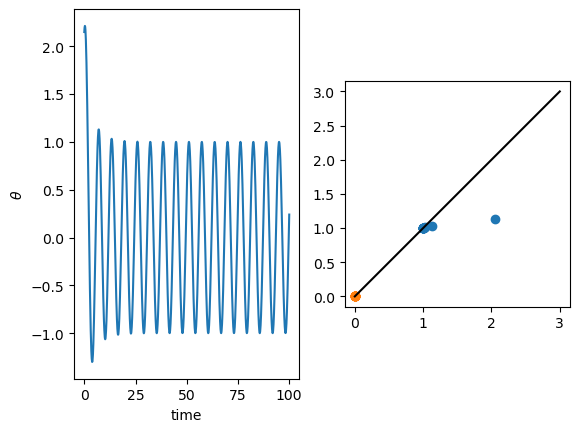

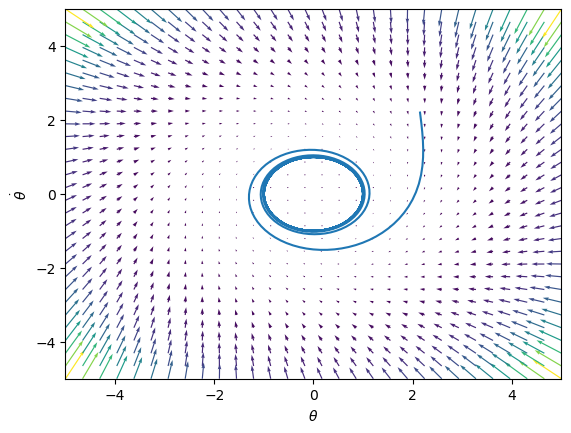

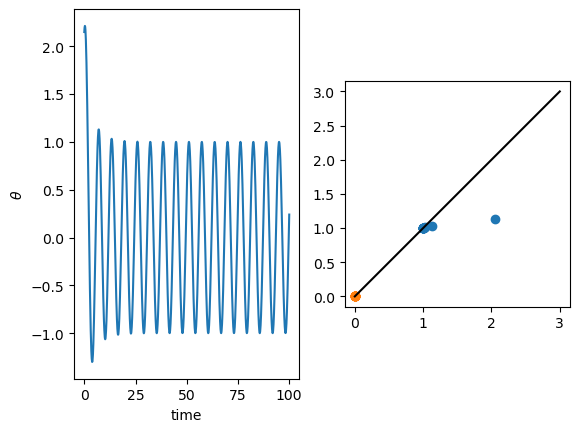

In [11]:
numpoints = 30
rng = 5

[x1_vf, x2_vf] = np.meshgrid(np.linspace(-rng,rng,numpoints), 
                             np.linspace(-rng,rng,numpoints)) 

mu = 1
omega = 1
eps =  .1
t_end = 100

######### Plot the vector field
dynamics = dynamics_fun(0, [x1_vf, x2_vf], mu, omega, eps)
norm = dynamics[0]**2 + dynamics[1]**2

plt.figure(2)
plt.clf()
plt.quiver(x1_vf, x2_vf, dynamics[0], dynamics[1], norm)

######### Solve for dynamics
x_0 = 3*np.random.rand(1)[0]
v_0 = 3*np.random.rand(1)[0]
sol = solve_ivp(lambda t, y: dynamics_fun(t, y, mu, omega, eps), 
                [0,t_end], [x_0, v_0],  
                events = Poincare_event2,
                rtol=1e-8, atol = 1e-8)


plt.plot(sol.y[0,:], sol.y[1,:])

plt.xlabel(r'$\theta$')
plt.ylabel(r'$\dot{\theta}$')
plt.axis([-rng, rng, -rng, rng])

plt.figure(1)
plt.clf()
P_events = sol.y_events[0]


plt.subplot(1,2,1);
plt.plot(sol.t, sol.y[0,:])
plt.ylabel('$\\theta$')
plt.xlabel('time')

plt.subplot(1,2,2);
plt.plot(P_events[:-2], P_events[1:-1],'o')
plt.plot([0,3], [0, 3], 'k-')
plt.gca().set_aspect('equal', 'box')
plt.gcf()


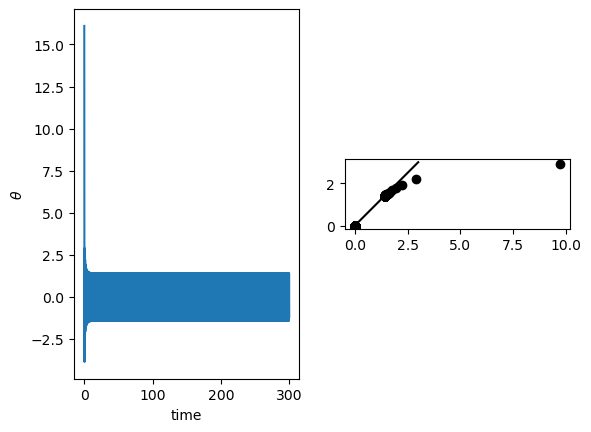

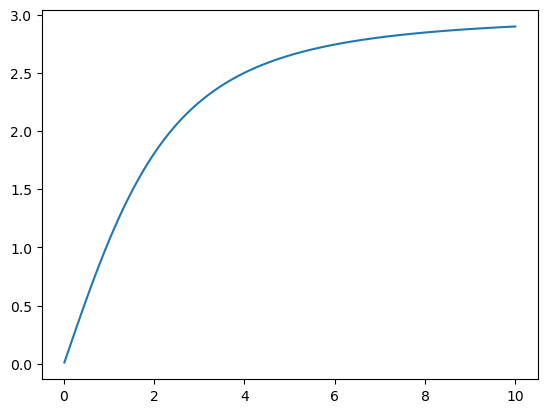

In [12]:
plt.figure(1)
plt.clf()

mu = 2
omega = 10
epsilon = .1
t_end = 300

p_events_all = []

for kk in range(1):
    x_0 = 20*np.random.rand(1)[0]
    v_0 = 20*np.random.rand(1)[0]

    sol = solve_ivp(lambda t, y: dynamics_fun(t, y, mu, omega, epsilon), 
                    [0,t_end], [x_0, v_0], 
                    events = Poincare_event2,
                    rtol=1e-8, atol = 1e-8)

    P_events = sol.y_events[0]
    
    p_events_all.append(P_events)

    plt.subplot(1,2,1);
    plt.plot(sol.t, sol.y[0,:])
    plt.ylabel('$\\theta$')
    plt.xlabel('time')

    plt.subplot(1,2,2);
    plt.plot(P_events[:-2], P_events[1:-1],'ko')
    plt.plot([0,3], [0, 3], 'k-')
    plt.gca().set_aspect('equal', 'box')
    plt.gcf()
    plt.pause(0.01)
    

tt = np.linspace(0.01,10,100)


plt.plot(tt, np.sqrt(mu / (1 - np.exp(-4*np.pi*mu*epsilon/omega)*(1 - mu/tt**2)**(1))))
